In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [59]:
data = pd.read_csv("train.csv")

In [60]:
print(data.shape)

(668, 11)


In [63]:
# refining
# 1
# print(data.dtypes)
# print(data.head)
data.drop(columns=['Name'],inplace=True)
# 2
# print(data.dtypes)
# print(data.head)

def f1(s):
    if s == 'male':
        return 0
    else:
        return 1
data.Sex = data.Sex.apply(f1)
# 3
data.drop(columns=['Ticket'],inplace=True)
# print(data.dtypes)
# print(data.head)
# 4
data.drop(columns=['SibSp'],inplace=True)
# print(data.dtypes)
# print(data.head)
# 5
data.drop(columns=['Cabin'],inplace=True)
# print(data.dtypes)
# print(data.head)
# 6
print(pd.unique(data.Embarked))
def f2(s):
    if s == 'S':
        return 1
    elif s=='C':
        return 2
    elif s=='Q':
        return 3
    else:
        return -1
data.Embarked = data.Embarked.apply(f2)
# print(data.dtypes)
# print(data.head)
# 7
# print(pd.unique(data.Age))
# data.Age.fillna(data.Age.mean(),inplace=True)
print(data.dtypes)
print(data.tail())

['S' 'C' 'Q' nan]
Pclass        int64
Sex           int64
Age         float64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object
     Pclass  Sex       Age  Parch     Fare  Embarked  Survived
663       2    1  17.00000      0  10.5000         1         1
664       3    0  29.70056      0   7.7500         3         0
665       3    0  32.00000      0  56.4958         1         1
666       3    1  22.00000      0   9.8375         1         0
667       3    1  29.70056      0  15.5000         3         1


In [64]:
y = data.Survived
print(y)
print(y.shape)

0      1
1      0
2      0
3      0
4      0
      ..
663    1
664    0
665    1
666    0
667    1
Name: Survived, Length: 668, dtype: int64
(668,)


In [65]:
x = data.iloc[:,:6]
print(x.shape)
print(x)

(668, 6)
     Pclass  Sex       Age  Parch     Fare  Embarked
0         2    1  29.00000      0  26.0000         1
1         3    0  29.70056      0   8.0500         1
2         2    0  39.00000      0  26.0000         1
3         3    1  29.00000      4  21.0750         1
4         3    0  25.00000      0   7.0500         1
..      ...  ...       ...    ...      ...       ...
663       2    1  17.00000      0  10.5000         1
664       3    0  29.70056      0   7.7500         3
665       3    0  32.00000      0  56.4958         1
666       3    1  22.00000      0   9.8375         1
667       3    1  29.70056      0  15.5000         3

[668 rows x 6 columns]


In [98]:
alg = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.3,max_iter=6000)

In [74]:
from sklearn import model_selection

In [75]:
x1,x2,y1,y2 = model_selection.train_test_split(x,y,test_size=0.3)

In [99]:
alg.fit(x1,y1)

LogisticRegression(l1_ratio=0.3, max_iter=6000, penalty='elasticnet',
                   solver='saga')

In [100]:
y2_pred = alg.predict(x2)

In [103]:
print(alg.score(x2,y2))

0.8159203980099502


In [105]:
alg.predict_proba(x2)

array([[0.45846914, 0.54153086],
       [0.73600527, 0.26399473],
       [0.15045982, 0.84954018],
       [0.72622698, 0.27377302],
       [0.89415472, 0.10584528],
       [0.39976905, 0.60023095],
       [0.4540465 , 0.5459535 ],
       [0.40264909, 0.59735091],
       [0.58574421, 0.41425579],
       [0.48575604, 0.51424396],
       [0.57551837, 0.42448163],
       [0.23006291, 0.76993709],
       [0.47989926, 0.52010074],
       [0.69994162, 0.30005838],
       [0.60821712, 0.39178288],
       [0.25731881, 0.74268119],
       [0.37903891, 0.62096109],
       [0.82448925, 0.17551075],
       [0.12672465, 0.87327535],
       [0.68969241, 0.31030759],
       [0.42253835, 0.57746165],
       [0.78642413, 0.21357587],
       [0.74019167, 0.25980833],
       [0.69276901, 0.30723099],
       [0.39416209, 0.60583791],
       [0.7076434 , 0.2923566 ],
       [0.51232505, 0.48767495],
       [0.80023738, 0.19976262],
       [0.75524926, 0.24475074],
       [0.45413866, 0.54586134],
       [0.

In [107]:
print(y2_pred)

[1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [108]:
print(y2.shape,y2_pred.shape)

(201,) (201,)


In [109]:
temp = np.arange(0,201,1)

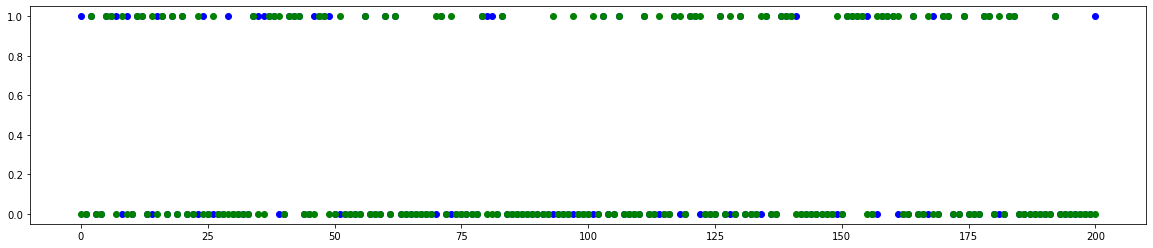

In [119]:
import matplotlib.pyplot as plt
plt.figure().set_figwidth(20)
plt.scatter(temp,y2_pred,color='blue')
plt.scatter(temp,y2,color='green')
plt.show()

In [120]:
data_2 = pd.read_csv("test.csv")

In [124]:
# refining
print(data_2.columns)
data_2.drop(columns=['Name','SibSp','Cabin','Ticket'],inplace=True)
data_2.Age.fillna(data_2.Age.mean(),inplace=True)
data_2.Embarked=data_2.Embarked.apply(f2)
data_2.Sex = data_2.Sex.apply(f1)

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')


KeyError: "['Name' 'SibSp' 'Cabin' 'Ticket'] not found in axis"

In [126]:
print(data_2.columns)
print(data_2.dtypes)

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')
Pclass        int64
Sex           int64
Age         float64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


In [127]:
y_test_pred = alg.predict(data_2)

In [128]:
print(y_test_pred)

[0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0]


In [129]:
pd.write_csv("predictions.csv")

AttributeError: module 'pandas' has no attribute 'write_csv'